<a href="https://colab.research.google.com/github/Chadliu123/TibameAI/blob/main/fashion_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
trans = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Boot"
]

Sneaker


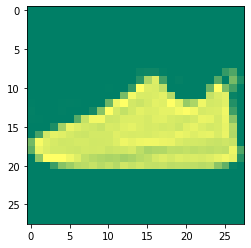

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="summer")
print(trans[y_train[idx]])
# pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
layers = [
    # 784 * 128 + 128 
    Dense(256, activation="relu", input_dim=784),
    Dropout(0.25),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# x_train_norm[0]

In [ ]:
# 只有一個神經元：binary cross-entropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元：categorical cross-entropy p1 log 1/q1 + ......
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
# batch：100`200(小圖片) 10`20(大圖片)
# epoch：整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000*2/200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 2s - loss: 0.5643 - accuracy: 0.8037 - val_loss: 0.4152 - val_accuracy: 0.8537
Epoch 2/50
540/540 - 2s - loss: 0.4053 - accuracy: 0.8569 - val_loss: 0.3900 - val_accuracy: 0.8578
Epoch 3/50
540/540 - 2s - loss: 0.3670 - accuracy: 0.8677 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 4/50
540/540 - 2s - loss: 0.3412 - accuracy: 0.8760 - val_loss: 0.3377 - val_accuracy: 0.8797
Epoch 5/50
540/540 - 2s - loss: 0.3267 - accuracy: 0.8815 - val_loss: 0.3328 - val_accuracy: 0.8792
Epoch 6/50
540/540 - 2s - loss: 0.3143 - accuracy: 0.8844 - val_loss: 0.3454 - val_accuracy: 0.8743
Epoch 7/50
540/540 - 2s - loss: 0.3025 - accuracy: 0.8899 - val_loss: 0.3210 - val_accuracy: 0.8827
Epoch 8/50
540/540 - 2s - loss: 0.2946 - accuracy: 0.8909 - val_loss: 0.3195 - val_accuracy: 0.8828
Epoch 9/50
540/540 - 2s - loss: 0.2836 - accuracy: 0.8961 - val_loss: 0.3187 - val_accuracy: 0.8843
Epoch 10/50
540/540 - 2s - loss: 0.2761 - accuracy: 0.8977 - val_loss: 0.3050 - val_accuracy: 0.8872

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8839


[0.32709166407585144, 0.883899986743927]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in trans],
      columns=["{}(預測)".format(n) for n in trans])

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Boot(預測)
T-shirt(原本),831,2,10,10,6,2,126,0,13,0
Trouser(原本),2,970,1,18,4,0,4,0,1,0
Pullover(原本),14,1,755,7,124,0,97,0,2,0
Dress(原本),28,6,6,887,34,0,33,0,6,0
Coat(原本),0,0,63,29,825,0,78,0,5,0
Sandal(原本),0,0,0,1,0,970,0,18,1,10
Shirt(原本),113,1,67,24,71,0,717,0,7,0
Sneaker(原本),0,0,0,0,0,16,0,968,0,16
Bag(原本),5,0,6,0,4,3,5,4,973,0
Boot(原本),0,0,0,0,0,13,1,43,0,943


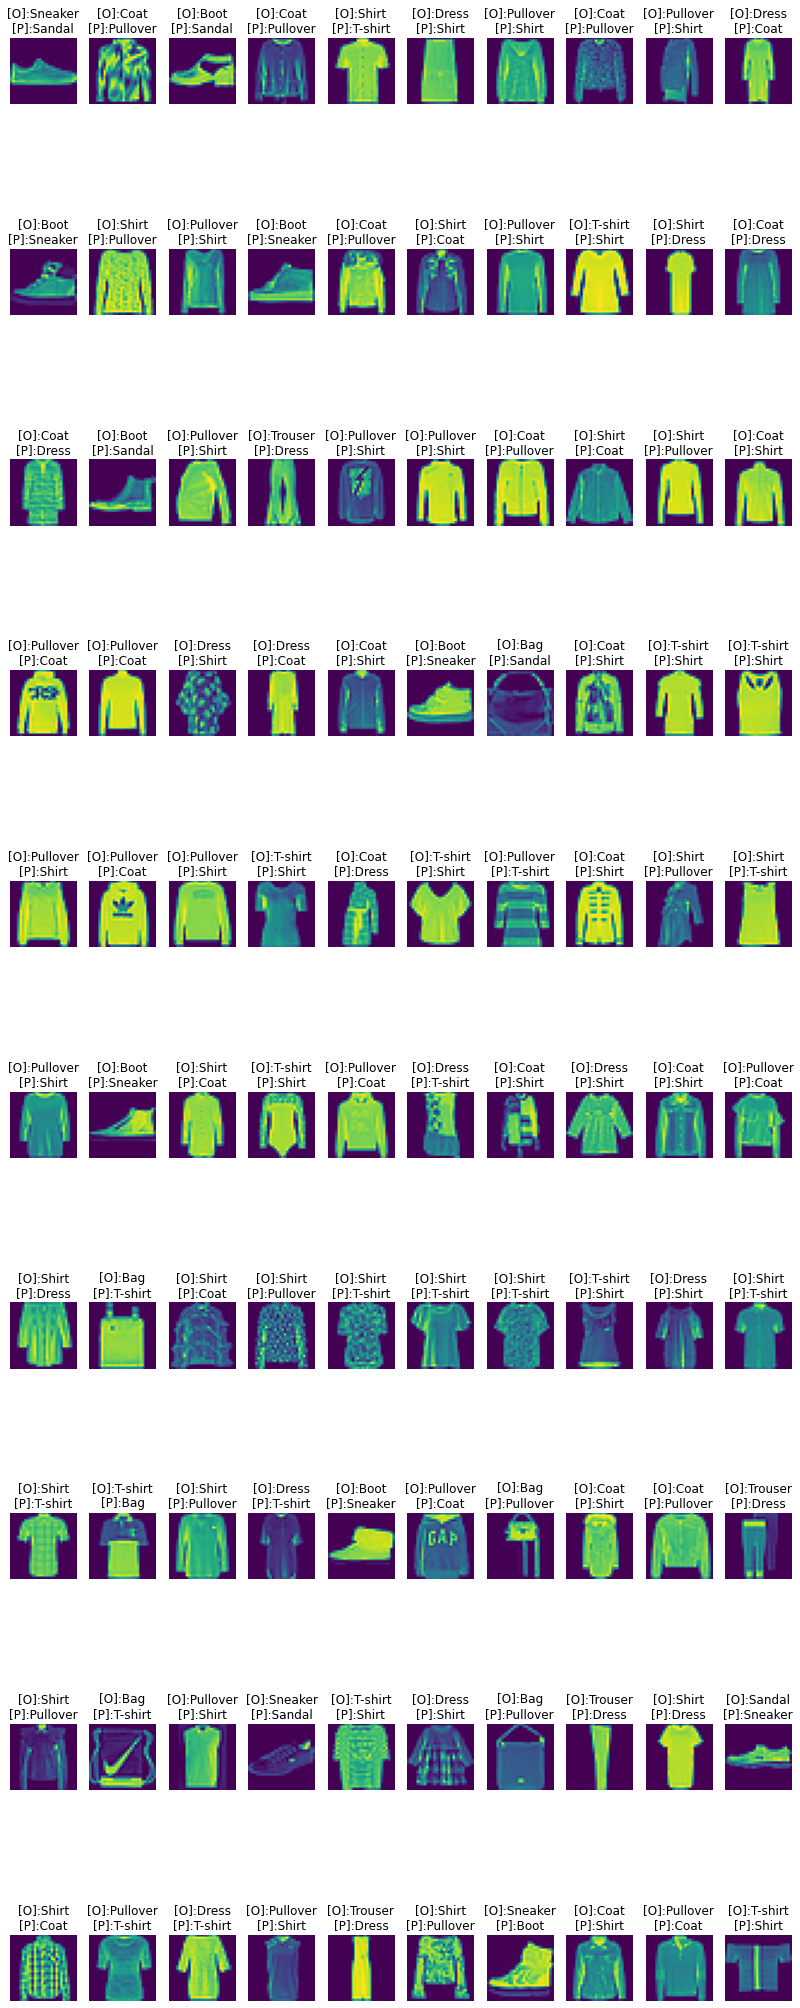

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:100]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:

# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
plt.imshow(img_np)